In [3]:
#importing modules and packages

import requests
from bs4 import BeautifulSoup
import json
import pandas as pd

In [4]:
base_url = 'https://understat.com/match/'
match_id = str(input("please enter match id :"))
url = base_url + match_id

please enter match id :17338


In [5]:
url

'https://understat.com/match/17338'

In [6]:
res = requests.get(url)
soup = BeautifulSoup(res.content,'lxml')
scripts =soup.find_all('script')

In [7]:
scripts

[<script>
 			var THEME = localStorage.getItem("theme") || 'DARK';
 			document.body.className = "theme-" + THEME.toLowerCase();
 		</script>,
 <script>
 	var shotsData 	= JSON.parse('\x7B\x22h\x22\x3A\x5B\x7B\x22id\x22\x3A\x22470890\x22,\x22minute\x22\x3A\x2212\x22,\x22result\x22\x3A\x22BlockedShot\x22,\x22X\x22\x3A\x220.91\x22,\x22Y\x22\x3A\x220.4809999847412109\x22,\x22xG\x22\x3A\x220.08072462677955627\x22,\x22player\x22\x3A\x22Ferr\x5Cu00e1n\x20Torres\x22,\x22h_a\x22\x3A\x22h\x22,\x22player_id\x22\x3A\x226441\x22,\x22situation\x22\x3A\x22OpenPlay\x22,\x22season\x22\x3A\x222021\x22,\x22shotType\x22\x3A\x22LeftFoot\x22,\x22match_id\x22\x3A\x2217338\x22,\x22h_team\x22\x3A\x22Barcelona\x22,\x22a_team\x22\x3A\x22Rayo\x20Vallecano\x22,\x22h_goals\x22\x3A\x220\x22,\x22a_goals\x22\x3A\x221\x22,\x22date\x22\x3A\x222022\x2D04\x2D24\x2019\x3A00\x3A00\x22,\x22player_assisted\x22\x3A\x22Pierre\x2DEmerick\x20Aubameyang\x22,\x22lastAction\x22\x3A\x22None\x22\x7D,\x7B\x22id\x22\x3A\x22470891\x22,\

In [8]:
## getting only shots data

strings =scripts[1].string

In [9]:
strings

"\n\tvar shotsData \t= JSON.parse('\\x7B\\x22h\\x22\\x3A\\x5B\\x7B\\x22id\\x22\\x3A\\x22470890\\x22,\\x22minute\\x22\\x3A\\x2212\\x22,\\x22result\\x22\\x3A\\x22BlockedShot\\x22,\\x22X\\x22\\x3A\\x220.91\\x22,\\x22Y\\x22\\x3A\\x220.4809999847412109\\x22,\\x22xG\\x22\\x3A\\x220.08072462677955627\\x22,\\x22player\\x22\\x3A\\x22Ferr\\x5Cu00e1n\\x20Torres\\x22,\\x22h_a\\x22\\x3A\\x22h\\x22,\\x22player_id\\x22\\x3A\\x226441\\x22,\\x22situation\\x22\\x3A\\x22OpenPlay\\x22,\\x22season\\x22\\x3A\\x222021\\x22,\\x22shotType\\x22\\x3A\\x22LeftFoot\\x22,\\x22match_id\\x22\\x3A\\x2217338\\x22,\\x22h_team\\x22\\x3A\\x22Barcelona\\x22,\\x22a_team\\x22\\x3A\\x22Rayo\\x20Vallecano\\x22,\\x22h_goals\\x22\\x3A\\x220\\x22,\\x22a_goals\\x22\\x3A\\x221\\x22,\\x22date\\x22\\x3A\\x222022\\x2D04\\x2D24\\x2019\\x3A00\\x3A00\\x22,\\x22player_assisted\\x22\\x3A\\x22Pierre\\x2DEmerick\\x20Aubameyang\\x22,\\x22lastAction\\x22\\x3A\\x22None\\x22\\x7D,\\x7B\\x22id\\x22\\x3A\\x22470891\\x22,\\x22minute\\x22\\x3A\\x221

In [10]:
 ## stripping unrelated data to get only json data
    
ind_start = strings.index("('") +2
ind_end  = strings.index("')")

json_data = strings[ind_start:ind_end]

json_data = json_data.encode('utf8').decode('unicode_escape')
    
 # converting json string to dictionary   
data =json.loads(json_data)


In [11]:
data

{'h': [{'id': '470890',
   'minute': '12',
   'result': 'BlockedShot',
   'X': '0.91',
   'Y': '0.4809999847412109',
   'xG': '0.08072462677955627',
   'player': 'Ferrán Torres',
   'h_a': 'h',
   'player_id': '6441',
   'situation': 'OpenPlay',
   'season': '2021',
   'shotType': 'LeftFoot',
   'match_id': '17338',
   'h_team': 'Barcelona',
   'a_team': 'Rayo Vallecano',
   'h_goals': '0',
   'a_goals': '1',
   'date': '2022-04-24 19:00:00',
   'player_assisted': 'Pierre-Emerick Aubameyang',
   'lastAction': 'None'},
  {'id': '470891',
   'minute': '12',
   'result': 'SavedShot',
   'X': '0.8669999694824219',
   'Y': '0.47',
   'xG': '0.08022822439670563',
   'player': 'Ronald Araújo',
   'h_a': 'h',
   'player_id': '8091',
   'situation': 'OpenPlay',
   'season': '2021',
   'shotType': 'RightFoot',
   'match_id': '17338',
   'h_team': 'Barcelona',
   'a_team': 'Rayo Vallecano',
   'h_goals': '0',
   'a_goals': '1',
   'date': '2022-04-24 19:00:00',
   'player_assisted': None,
   'las

In [15]:
minute = []
x = []
y = []
xg = []
result =[]
team =[]
player =[]
data_away = data['a']
data_home = data['h']

for index in range(len(data_home)):
    for key in data_home[index]:
        if key =='minute' :
            minute.append(data_home[index][key])
        if key =='X' :
            x.append(data_home[index][key])
        if key =='Y' :
            y.append(data_home[index][key])
        if key =='xG' :
            xg.append(data_home[index][key])
        if key =='result' :
            result.append(data_home[index][key])
        if key =='player' :
            player.append(data_home[index][key])
        if key =='h_team' :
            team.append(data_home[index][key])

            
            
for index in range(len(data_away)):
    for key in data_away[index]:
        if key =='minute' :
            minute.append(data_away[index][key])
        if key =='X' :
            x.append(data_away[index][key])
        if key =='Y' :
            y.append(data_away[index][key])
        if key =='xG' :
            xg.append(data_away[index][key])
        if key =='result' :
            result.append(data_away[index][key])
        if key =='player' :
            player.append(data_away[index][key])
        if key =='a_team' :
            team.append(data_away[index][key])


In [17]:
## creating data frame
col_names = ['minute','x','y','xg','result','team','player']
df = pd.DataFrame([minute,x,y,xg,result,team,player],index =col_names)
df= df.T

In [18]:
df

,minute,x,y,xg,result,team,player
0,12,0.91,0.4809999847412109,0.08072462677955627,BlockedShot,Barcelona,Ferrán Torres
1,12,0.8669999694824219,0.47,0.08022822439670563,SavedShot,Barcelona,Ronald Araújo
2,24,0.7780000305175782,0.6630000305175782,0.0198101457208395,ShotOnPost,Barcelona,Jordi Alba
3,30,0.8669999694824219,0.69,0.04328451305627823,MissedShots,Barcelona,Jordi Alba
4,33,0.7280000305175781,0.28100000381469725,0.01111910305917263,MissedShots,Barcelona,Ousmane Dembélé
5,33,0.94,0.45799999237060546,0.12364386767148972,BlockedShot,Barcelona,Pierre-Emerick Aubameyang
6,41,0.895,0.534000015258789,0.08851879835128784,ShotOnPost,Barcelona,Gavi
7,45,0.8069999694824219,0.48700000762939455,0.14696717262268066,MissedShots,Barcelona,Ousmane Dembélé
8,57,0.8159999847412109,0.66,0.05171395093202591,BlockedShot,Barcelona,Jordi Alba
9,69,0.91,0.475,0.08864908665418625,BlockedShot,Barcelona,Memphis Depay


In [19]:
 df.to_csv('Barca_Rayo', header=True, index=False)

In [119]:
df=pd.read_csv("Barca_rayo_new.csv")

In [107]:
## plotting data
import matplotlib as mlp
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch

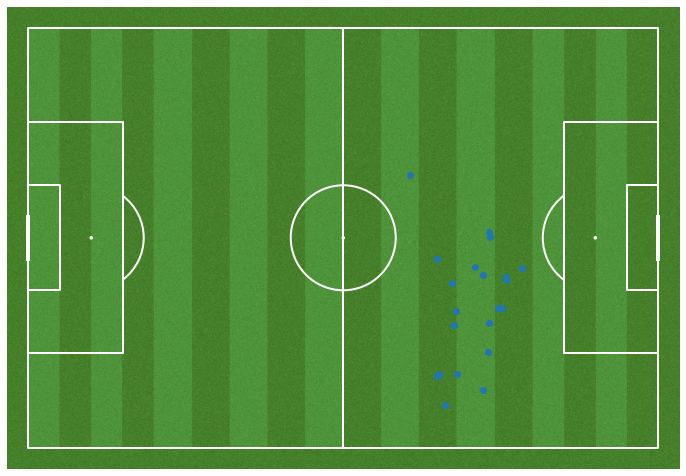

In [145]:
fig, ax =plt.subplots(figsize = (13 ,8.5))
pitch = Pitch(pitch_type='statsbomb',orientation='vertical',
              pitch_color='grass', line_color='white',stripe=True, figsize=(13,8),
            constrained_layout=True, tight_layout=False)
pitch.draw(ax=ax)
plt.scatter(df['X'],df['Y'])
